# RANSAC plane detection

Full version with n-planes detection here: https://github.com/Hodapp87/ransac_planes/blob/master/Plane%20Detection.ipynb


In [7]:
import numpy

In [8]:
def ransac_step(data, thresh):
    random_points = []
    while(len(random_points) < 3):
        rand_int = numpy.random.choice(data.shape[0])
        if rand_int not in random_points:
             random_points.append(rand_int)
                
    p0, p1, p2 = data[random_points[0], :], data[random_points[1], :], data[random_points[2], :]
    
    vectors = numpy.cross(p1 - p0, p2 - p0)
    norm    = numpy.linalg.norm(vectors)
    ABC     = vectors/norm
    D       = -ABC.dot(p0)
    
    dist    = numpy.abs(ABC.dot(data.T) + D)
    
    pts_on_plane = dist <= thresh
    std          = dist[pts_on_plane].std()

    return pts_on_plane, std, ABC, D

In [9]:
filepath   = "./src/test10points.txt"
datafile   = open(filepath, 'r')

thresh  = float(datafile.readline())
points_cnt = int(datafile.readline())

data = numpy.zeros((points_cnt, 3))
for i in range(data.shape[0]):
    string = datafile.readline()
    splited = string.split('\t')
    data[i] = [float(splited[0]), float(splited[1]), float(splited[2])]

datafile.close()

ransac_steps = 200

pts2plane      = numpy.zeros(data.shape[0])
pts2plane[:]   = -1
unassigned_pts = pts2plane < 0

best_num_pts_on_plane = 0
best_pts_on_plane     = []
best_std = numpy.inf
best_ABC = None
best_D = None

while(procent < 50):
    pts_on_plane, std, ABC, D = ransac_step(data[unassigned_pts,:], thresh)
    num_pts_on_plane = pts_on_plane.sum()
    print("Num points on plane:", num_pts_on_plane, "Best:", best_num_pts_on_plane)
    print("Std:", std, "Best: ", best_std)
    print("ABC:", ABC, "Best: ", best_ABC)
    print("D:", D, "Best:", best_D, "\n")
    if num_pts_on_plane > best_num_pts_on_plane or \
    (num_pts_on_plane == best_num_pts_on_plane and std < best_std):
        best_num_pts_on_plane = num_pts_on_plane
        best_pts_on_plane = pts_on_plane
        best_std = std
        best_ABC = ABC
        best_D   = D
        procent  = (best_num_pts_on_plane * 100) / data.shape[0]


print("BEST ABC = ", best_ABC, "BEST D = ", best_D)

('Num points on plane:', 4, 'Best:', 0)
('Std:', 5.551115123125783e-17, 'Best: ', inf)
('ABC:', array([ 0.00998518,  0.05349205, -0.99851835]), 'Best: ', None)
('D:', 0.5349205448923812, 'Best:', None, '\n')
('Num points on plane:', 3, 'Best:', 4)
('Std:', 0.0, 'Best: ', 5.551115123125783e-17)
('ABC:', array([-0.20005731,  0.01546835,  0.97966209]), 'Best: ', array([ 0.00998518,  0.05349205, -0.99851835]))
('D:', 2.0572903806821654, 'Best:', 0.5349205448923812, '\n')
('Num points on plane:', 3, 'Best:', 4)
('Std:', 7.251946429389431e-16, 'Best: ', 5.551115123125783e-17)
('ABC:', array([-0.35265525,  0.03926702,  0.93492908]), 'Best: ', array([ 0.00998518,  0.05349205, -0.99851835]))
('D:', 4.756919139473704, 'Best:', 0.5349205448923812, '\n')
('Num points on plane:', 3, 'Best:', 4)
('Std:', 0.0, 'Best: ', 5.551115123125783e-17)
('ABC:', array([ 0.40918486, -0.07577497,  0.90929968]), 'Best: ', array([ 0.00998518,  0.05349205, -0.99851835]))
('D:', -8.365557051769075, 'Best:', 0.5349205

/home/v.granovskiy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':
/home/v.granovskiy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal


('D:', -11.059824147686191, 'Best:', -1.3877787807814457e-17, '\n')
('Num points on plane:', 8, 'Best:', 8)
('Std:', 1.808044092409165e-17, 'Best: ', 5.329802314133027e-18)
('ABC:', array([-9.99950004e-03, -2.22033504e-18,  9.99950004e-01]), 'Best: ', array([-9.99950004e-03,  5.55083759e-19,  9.99950004e-01]))
('D:', -5.551115123125783e-17, 'Best:', -1.3877787807814457e-17, '\n')
('Num points on plane:', 4, 'Best:', 8)
('Std:', 4.440892098500626e-16, 'Best: ', 5.329802314133027e-18)
('ABC:', array([-0.3376763 ,  0.17346385, -0.92514054]), 'Best: ', array([-9.99950004e-03,  5.55083759e-19,  9.99950004e-01]))
('D:', 5.203915516514844, 'Best:', -1.3877787807814457e-17, '\n')
('Num points on plane:', 8, 'Best:', 8)
('Std:', 1.3437110265466432e-17, 'Best: ', 5.329802314133027e-18)
('ABC:', array([ 0.0099995,  0.       , -0.99995  ]), 'Best: ', array([-9.99950004e-03,  5.55083759e-19,  9.99950004e-01]))
('D:', 2.7755575615628914e-17, 'Best:', -1.3877787807814457e-17, '\n')
('Num points on pl

**Визуализация**

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

def plot_flat(data, A, B, C, D):
    
    X,Y = numpy.meshgrid(numpy.arange(-30.0, 30.0, 0.5), numpy.arange(-30.0, 30.0, 0.5))
    
    Z = -(A*X + B*Y + D)/C
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=1)
    ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    plt.show()

(-0.009999500037496875, -5.550837588184573e-19, 0.9999500037496876, -1.3877787807814457e-17)


<IPython.core.display.Javascript object>


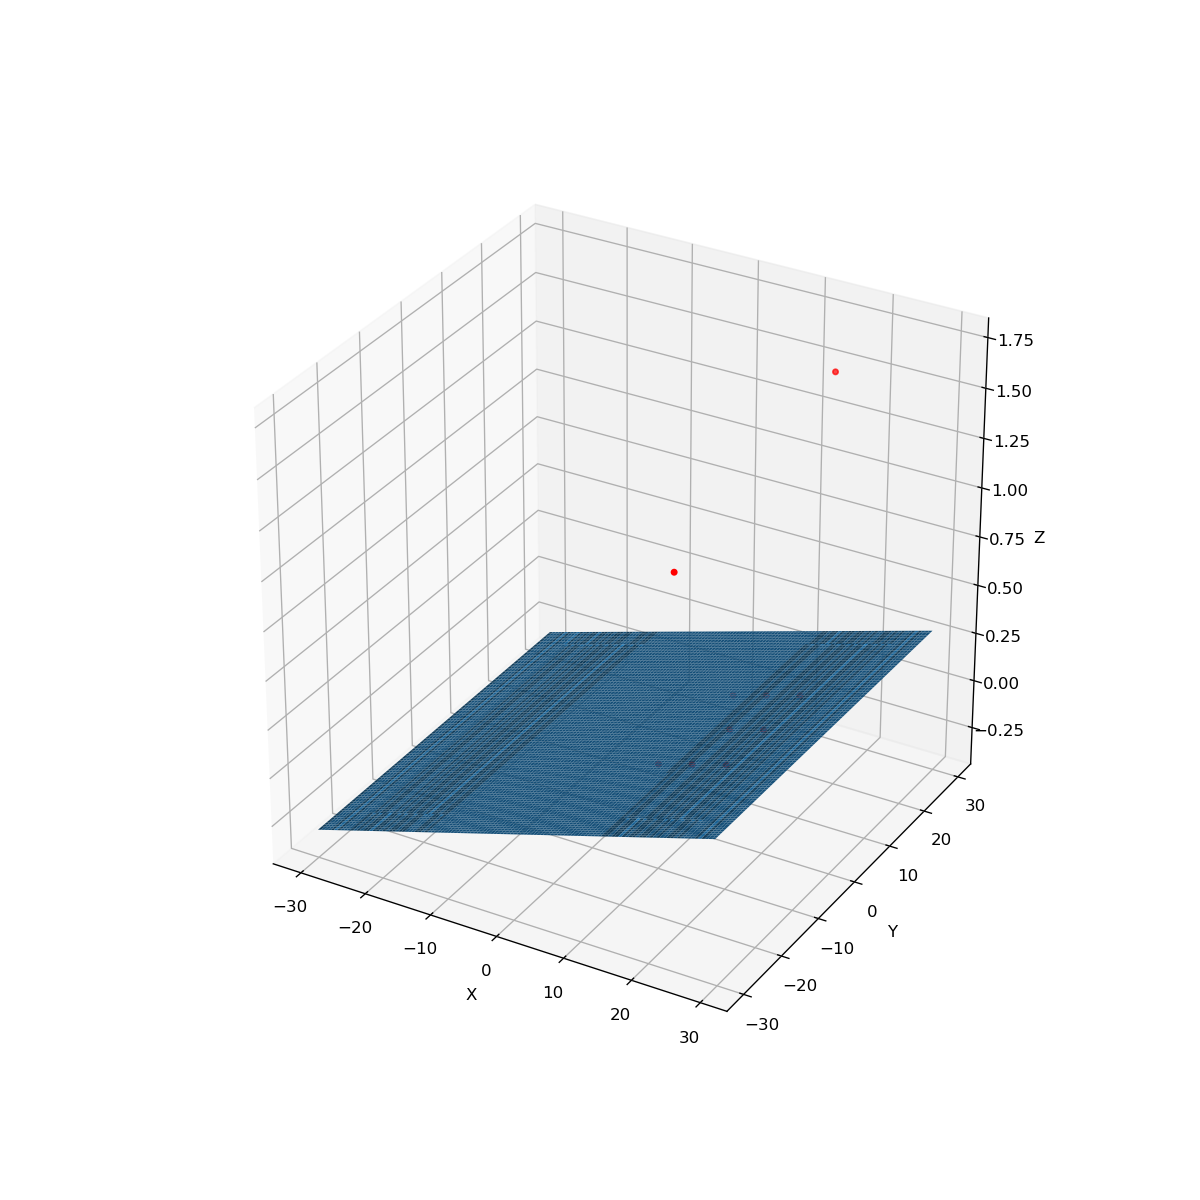

In [6]:
%matplotlib notebook
A, B, C = best_ABC
D = best_D
print(A, B, C, D)
plot_flat(data, A, B, C, D)

**Код для вставки в Я.Контест**

In [4]:
# Before copy-paste check-list:
#     - RESTART KERNEL AND TRY TO RUN AGAIN
#     - ADD PARENTIES TO PRINT
#     - CHECK INPUT FILENAME

import numpy

def ransac_step(data, thresh):
    random_points = []
    while(len(random_points) < 3):
        rand_int = numpy.random.choice(data.shape[0])
        if rand_int not in random_points:
             random_points.append(rand_int)
                
    p0, p1, p2 = data[random_points[0], :], data[random_points[1], :], data[random_points[2], :]
    
    vectors = numpy.cross(p1 - p0, p2 - p0)
    norm    = numpy.linalg.norm(vectors)
    ABC     = vectors/norm
    D       = -ABC.dot(p0)
    
    dist    = numpy.abs(ABC.dot(data.T) + D)
    
    pts_on_plane = dist <= thresh
    std          = dist[pts_on_plane].std()

    return pts_on_plane, std, ABC, D

filepath   = "./src/test10points.txt"
datafile   = open(filepath, 'r')
thresh     = float(datafile.readline())
points_cnt = int(datafile.readline())

data = numpy.zeros((points_cnt, 3))
for i in range(data.shape[0]):
    string  = datafile.readline()
    splited = string.split('\t')
    data[i] = [float(splited[0]), float(splited[1]), float(splited[2])]

datafile.close()

points = data

ransac_steps = 200

pts2plane      = numpy.zeros(data.shape[0])
pts2plane[:]   = -1
unassigned_pts = pts2plane < 0

best_num_pts_on_plane = 0
best_pts_on_plane     = []
best_std = numpy.inf
best_ABC = None
best_D   = None

for i in range(ransac_steps):
    pts_on_plane, std, ABC, D = ransac_step(points[unassigned_pts,:], thresh)
    num_pts_on_plane = pts_on_plane.sum()
    if num_pts_on_plane > best_num_pts_on_plane or \
    (num_pts_on_plane == best_num_pts_on_plane and std < best_std):
        best_num_pts_on_plane = num_pts_on_plane
        best_pts_on_plane = pts_on_plane
        best_std = std
        best_ABC = ABC
        best_D   = D

A, B, C = best_ABC
D       = best_D

print ("%.6f" % (A), "%.6f" % (B), "%.6f" % (C), "%.6f" % (D))

('-0.010000', '-0.000000', '0.999950', '-0.000000')


/home/v.granovskiy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
/home/v.granovskiy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less_equal
